In [1]:
from __future__ import division

from matplotlib import pyplot as plt
from collections import Counter
import math

# 自定义模块
import linear_algebra as la

# 5. 统计学
统计学是我们赖以理解数据的数学与技术。这是一个庞大繁荣的领域，要用图书馆的一整个书架的书来阐述，绝非一本书的一个章节所能尽述，所以本书的探讨必然不会太深入。

## 5.1 描述单个数据集
我们描述`DataSciencester`公司会员的朋友数。对任何数据集，最简单的描述方法就是数据本身：

In [2]:
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,
                      12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,
                      9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,
                      7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,
                      5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,
                      3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,
                      1,1,1,1,1,1,1,1,1,1,1,1,1,1]

对足够小的数据集来说，这甚至可以说是最好的描述方法。但随着数据规模变大，这就显得笨拙又含混了(想象一个包含一亿个数字的列表)。为此，我们使用统计来提炼和表达数据的相关特征。

首先，我们通过`Couner`和`plt.bar()`把你的朋友数绘成直方图 ：

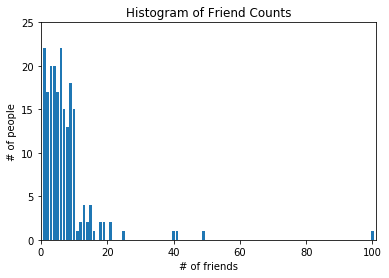

In [3]:
friend_counts = Counter(num_friends) 
xs = range(101) 
ys = [friend_counts[x] for x in xs] 
plt.bar(xs, ys) 
plt.axis([0, 101, 0, 25]) 
plt.title("Histogram of Friend Counts") 
plt.xlabel("# of friends") 
plt.ylabel("# of people") 
plt.show()

不幸的是，这幅图难以用来进行交流，所以你需要再提炼一些统计量。数据点个数大概就是最简单的统计量了：

In [4]:
num_points = len(num_friends)
num_points

204

也许你会对数据集的最大值和最小值感兴趣：

In [5]:
sorted_values = sorted(num_friends) 
smallest_value = sorted_values[0] 
second_smallest_value = sorted_values[1] 
second_largest_value = sorted_values[-2]
[smallest_value, second_smallest_value, second_largest_value]

[1, 1, 49]

### 5.1.1 中心倾向
我们常常希望了解数据中心位置的一些概念。 一个常用的方法是使用`均值` ，即用数据和除以数据个数：

In [6]:
# this isn't right if you don't from __future__ import division 
def mean(x):
    return sum(x) / len(x)

mean(num_friends)

7.333333333333333

如果你有两个数据点，均值就意味着两点的中间点。随着数据集中点数的增加，均值点会移动，但它始终取决于每个点的取值。

我们常常也会用到`中位数`，它是指数据中间点的值(数据点的个数是奇数)，或者中间两个点的平均值(数据点的个数是偶数)。

注意，和均值不同，中位数并不依赖于每一个数据的值。例如，即便数据集中最大的点变得更大（或最小的点变得更小），中间的数据点都不会变，意味着中位数也不会变：

In [7]:
def median(v):
    """finds the 'middle-most' value of v""" 
    n = len(v) 
    sorted_v = sorted(v) 
    midpoint = n // 2
    if n % 2 == 1:
        # if odd, return the middle value 
        return sorted_v[midpoint] 
    else:
        # if even, return the average of the middle values 
        lo = midpoint - 1 
        hi = midpoint 
        return (sorted_v[lo] + sorted_v[hi]) / 2

median(num_friends)

6.0

均值的计算更简单，并且它会随着数据变化而平稳地变化。如果有$n$个数据点，其中某一个点的值增加了$e$，则均值随之增加$\frac{e}{n}$，这使得均值适用于各种微分运算。但是为了计算中位数，得先对数据排序。并且，如果其中一个数据点的值增加了$e$，那么中位数有可能也增加$e$，有可能增加一个小于$e$的数，也有可能根本不变（这取决于其他的数据）。

均值对数据中的异常值非常敏感。如果最具人缘的用户有200个朋友（不是100），均值会上升至7.82，而中位数不变。如果异常值属于不良数据（或者对我们试图理解的现象不具有代表性），那么均值会误导我们。举一个老生常谈的例子，20世纪80年代，北卡罗来纳大学起薪最高的专业是地理学，因为球星迈克尔·乔丹曾就读于此，均值计算就包含了这个`异常值`。

中位数的一个泛化概念是`分位数`（quantile），它表示少于数据中特定百分比的一个值。

In [8]:
def quantile(x, p):
    """returns the pth-percentile value in x""" 
    p_index = int(p * len(x)) 
    return sorted(x)[p_index]

q1 = quantile(num_friends, 0.10) # 1 
q2 = quantile(num_friends, 0.25) # 3 
q3 = quantile(num_friends, 0.75) # 9 
q4 = quantile(num_friends, 0.90) # 13
[q1, q2, q3, q4]

[1, 3, 9, 13]

还有一个不太常用的概念`众数`（mode），它是指出现次数最多的一个或多个数：

In [9]:
def mode(x):
    """returns a list, might be more than one mode""" 
    counts = Counter(x) 
    max_count = max(counts.values()) 
    return [x_i for x_i, count in counts.items() if count == max_count]

mode(num_friends)

[6, 1]

### 5.1.2 离散度
离散度是数据的离散程度的一种度量。通常，如果它所统计的值接近零，则表示数据聚集在一起，离散程度很小；如果值很大，则表示数据的离散度很大。例如，一个简单的度量是`极差`（range），指最大元素与最小元素的差：

In [10]:
# "range" already means something in Python, so we'll use a different name 
def data_range(x):
    return max(x) - min(x)

data_range(num_friends) # 99

99

极差恰好为零，意味着数据集中最大值和最小值相等，这种情形只有在$x$中的元素全部相同时才会发生，意味着数据没有离散。相反，如果极差很大，说明最大元素比最小元素大很多，数据离散度很高。

和中位数一样，极差也不真正依赖于整个数据集。一个只包含0和100的数据集，和一个包含0、1以及很多个50的数据集，两者的极差相同。但看起来第一个数据集的离散度`应该`更高。

离散度的另一个更复杂的度量是`方差`（variance），计算方式如下：

In [11]:
def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)""" 
    x_bar = mean(x) 
    return [x_i - x_bar for x_i in x]

def variance(x):
    """assumes x has at least two elements""" 
    n = len(x) 
    deviations = de_mean(x) 
    return la.sum_of_squares(deviations) / (n - 1)

variance(num_friends)

81.54351395730716

> 这个概念看起来似乎是各个数值分别与其均值之差的平方的均值，但我们除以的是$n-1$而不是$n$。事实上，如果样本取自更大的总体，$x\_bar$就是真实均值的估值，意味着$(x\_i-x\_bar)^2$是$x\_i$的方差对均值的低估值，所以我们除以$n-1$而不是$n$。更多信息请查看维基百科。

现在，无论我们的数据是什么单位（即`朋友`），所有中心倾向的度量都是同一单位。极差的单位也与此相同。但是，方差的单位是原数据单位的平方（即`平方朋友`）。然而，用方差很难给出直观的比较，所以我们更常使用`标准差`（standard deviation）：

In [12]:
def standard_deviation(x):
    return math.sqrt(variance(x))

standard_deviation(num_friends)

9.03014473623248

极差和标准差也都有我们之前提到的均值计算常遇到的异常值问题。再看之前的例子，如果我们最具人缘的用户有200个朋友，标准差就变为14.89，增加了60%！

一种更加稳健的方案是计算75%的分位数和25%的`分位数之差`：

In [13]:
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

interquartile_range(num_friends)

6

## 5.2 相关
DataSciencester想要验证`用户在某个网站上花费的时间与其在这个网站上拥有的朋友数相关`。

通过分析研究流量日志，你设法做出了一个`daily_minutes`列表，这个列表描述了每个用户每天在DataSciencester花费了多长时间。你还对这个列表排了序，使它的元素和你之前的列表`num_friends`的元素对应了起来，以便进一步研究两个度量之间的关系。

In [14]:
daily_minutes = [
    1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,
    47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,
    39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,
    24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,
    36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,
    37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,
    24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,
    34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,
    43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,
    36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,
    28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,
    14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,
    18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,
    27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,
    22.61,26.89,23.48,8.38,27.81,32.35,23.84]

我们先来看一下`协方差`（covariance），这个概念是方差的一个对应词。方差衡量了单个变量对均值的偏离程度，而协方差衡量了两个变量对均值的串联偏离程度：

In [15]:
def covariance(x, y):
    n = len(x) 
    return dot(de_mean(x), de_mean(y)) / (n - 1) 

covariance(num_friends, daily_minutes) # 22.43

NameError: name 'dot' is not defined

回想一下`点积`（dot）的概念，它意味着对应的元素对相乘后再求和。如果向量$x$和向量$y$的对应元素同时大于它们自身序列的均值，或者同时小于它们自身序列的均值，那将为求和贡献一个正值。如果其中一个元素大于自身的均值，而另一个小于自身的均值，那将为求和贡献一个负值。因此，如果协方差是一个大的正数，就意味着如果$y$很大，那么$x$也很大，或者如果$y$很小，那么$x$也很小。如果协方差为负而且绝对值很大，就意味着$x$和$y$一个很大，而另一个很小。接近零的协方差意味着以上关系都不存在。

但是，这个数字很难解释，原因如下。
+ 它的单位是输入单位的乘积（即`朋友-分钟-每天`），难于理解
+ 如果每个用户的朋友数增加到两倍（但分钟数不变），方差会增加至两倍。但从某种意义上讲，变量的相关度是一样的。换句话讲，很难说`大`的协方差意味着什么。

因此，相关是更常受到重视的概念，它是由协方差除以两个变量的标准差：

In [ ]:
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero

correlation(num_friends, daily_minutes)

相关系数没有单位，它的取值在`-1`（完全反相关）和`1`（完全相关）之间。 相关值`0.25` 代表一个相对较弱的正相关。

但是，我们忽略了对数据的检查：

In [ ]:
plt.scatter(num_friends, daily_minutes)
plt.axis([0, 105, 0, 100])
plt.title("Correlation with an outlier")
plt.xlabel("# of friends") 
plt.ylabel("minutes per day") 
plt.show()

图中那个有100个朋友的用户（每天只在网上花费 1 分钟）是一个明显的异常值，相关系数的计算对异常值非常敏感。如果我们计算时忽略这个人：

In [ ]:
outlier = num_friends.index(100)

num_friends_good = [x for i, x in enumerate(num_friends) if i != outlier] 
daily_minutes_good = [x for i, x in enumerate(daily_minutes) if i != outlier] 
correlation(num_friends_good, daily_minutes_good)

排除了这个异常值，相关性明显增强了:

In [ ]:
plt.scatter(num_friends_good, daily_minutes_good)
plt.axis([0, 50, 0, 100])
plt.title("Correlation after removing the outlier")
plt.xlabel("# of friends") 
plt.ylabel("minutes per day") 
plt.show()

通过进一步调查，你发现这个异常值实际上仅仅是一个内部测试账号，这样你就可以理直气壮地删除它了。

## 5.3 辛普森悖论
辛普森悖论是指分析数据时可能会发生的意外。具体而言，如果忽略了混杂变量，相关系数会有误导性。

例如，假设你先将所有会员分成东海岸数据科学家和西海岸数据科学家两类，然后决定验证一下哪一边海岸的数据科学家更友好：

| 海岸 | 成员数 | 平均朋友数 |
| ------ | ------ | ------ |
| 西海岸 | 101 | 8.2 |
| 东海岸 | 103 | 6.5 |

很明显，西海岸的数据科学家比东海岸的数据科学家更招人喜欢。你的同事还可以给出许多理由解释这个结果：或许是阳光、咖啡、有机农产品，又或许是旖旎的太平洋风光。

但分析数据时，你却发现了一些奇怪的结论。如果你仅仅比较拥有博士学位的数据科学家，结论表明东海岸数据科学家的平均朋友数更多。如果再仅仅比较没有博士学位的数据科学家，结论仍然是东海岸的数据科学家平均拥有更多的朋友！

| 海岸 | 学位 | 成员数 | 平均朋友数 |
| ------ | ------ | ------ | ------ |
| 西海岸 | 博士  | 35 | 3.1 |
| 东海岸 | 博士 | 70 | 3.2 |
| 西海岸 | 非博士 | 66 | 10.9 |
| 东海岸 | 非博士 | 33 | 13.4 |

一旦你考虑了用户的学位，得出的相关系数就会发生变化！将东海岸科学家的数据和西海岸科学家的数据混同起来，会掩盖一件事实，即东海岸数据科学家更偏向博士类型。

这种现象在现实世界中时有发生。关键点在于，相关系数假设在其他条件都相同的前提之下衡量两个变量的关系。而当数据类型变成随机分配，就像置身于精心设计的实验之中时，“其他条件都相同”也许还不是一个糟糕的前提假设。但如果存在另一种类型分配的更深的机制，“其他条件都相同”可能会成为一个糟糕的前提假设。

避免这种窘境的唯一务实的做法是充分了解你的数据，并且尽可能核查所有可能的混杂因素。显然，这不可能万无一失。如果你没有这200个数据科学家的受教育程度的数据，你很可能就已经得出了西海岸的数据科学家天生更有社交能力的结论。

## 5.4 相关系数其他注意事项
相关系数为零表示两个变量之间不存在线性关系。但它们之间还可能会存在其他形式的关系。例如，如果：
```python
x = [-2, -1, 0, 1, 2] 
y = [ 2, 1, 0, 1, 2]
```

$x$和$y$的相关系数为0。但容易看出，$x$和$y$之间显然具有某种关系——$y$中的每个元素等于$x$中相应元素的绝对值。然而，有一种关系它们却无法给出，即$x\_i$和$mean(x)$之间的关系与$y\_i$和$mean(y)$之间的关系并没有太大关联。这是一种相关系数试图捕捉的关系。

此外，相关系数无法告诉你关系有多强。例如：
```python
x = [-2, 1, 0, 1, 2] 
y = [99.98, 99.99, 100, 100.01, 100.02]
```

以上这两个变量完全相关，但（这取决于你想度量什么）很有可能这种关系并没有实际意义。

## 5.5 相关和因果
`相关不是因果`。这是个重要的论断，即如果$x$和$y$强相关，那么意味着可能$x$引起了$y$，或$y$引起了$x$，或者两者相互引起了对方，或者存在第三方因素同时引起了x和y，或者什么都不是。

回想一下`num_friends`和`daily_minutes`之间的关系。如果`DataSciencester`用户在网站上拥有更多的朋友，可能会引起一个结果，即这些用户可能就会愿意在网上花费更多的时间。也可能是这种情形：如果每个朋友每天发布一定数量的内容，那么用户的朋友越多，就需要越多的时间来浏览朋友们的更新。

但是，也有这样一种可能。你泡在`DataSciencester`论坛上的时间越长，你就越有可能碰上和结识志同道合的朋友。这也意味着，在网站上花费时间越多，就会拥有更多朋友。

第三种可能是，越是那些热衷于数据科学的用户，就越喜欢在网上花更多时间（因为他们发现这更有趣），并且更乐于结交数据科学家朋友（因为他们对其他人不感冒）。

进行随机试验是证实因果关系的可靠性的一个好方法。你可以先将一组具有类似的统计数据的用户随机分为两组，再对其中一组施加稍微不同的影响因素，然后你会发现，不同的因素会导致不同的结果。

比如，做个[用户实验](http://www.nytimes.com/2014/06/30/technology/facebook-tinkers-with-users-emotions-in-news-feed-experiment-stirring-outcry.html?_r=0)，随机从用户中抽取一个小样本，只给他们看他们一小部分朋友的动态更新。如果这个小样本中的用户在网上花费的时间相应地变少，那么你就可以肯定“拥有更多朋友会引起上网时间变长”这一结论了。